# Titanic - Survival rate analysis

# Introduction

The objective of this exercise is to create a model that predicts who will survive in titanic, will it be Adult or Children? Men or Women?

For this exercise `titanic3.csv` data (Source: [Link](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt)) has been used.

# Procedure

In [401]:
import numpy as np
import pandas as pd
import seaborn as sns

In [402]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm

import graphviz

In [403]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [404]:
%matplotlib inline

In [405]:
tc = pd.read_csv("titanic3.csv")

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this exercise|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic| |
|`parch`| The number of parents or childen that are also traveling on the Titanic| |
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

## Women and children first?

In [406]:
tc['Child'] = np.where(tc['age'] > 9, 'Adult', 'Child')

Here we are creating a column Child, for all those people who are less than 10 years old. This is mainly done to clearly differentiate between Adult and Child

## Survival Rate Interpretation

###  Observation

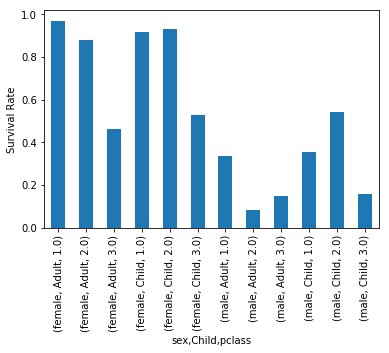

In [426]:
g = tc['survived'].groupby([tc['sex'], tc['Child'],tc['pclass']]).mean().plot.bar();
#tc['survived'].groupby([tc['sex'], tc['Child'],tc['pclass']]).mean()

g.set_ylabel('Survival Rate');

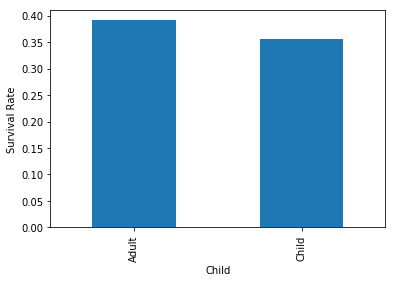

In [427]:
g = tc['survived'].groupby([tc['Child']]).mean().plot.bar();

g.set_ylabel('Survival Rate');

From here we can see that about 40% of adults survived and about 35% of children have survived. But there could be some outliers, lets look at the decision tree and see what model is generalted for this data.

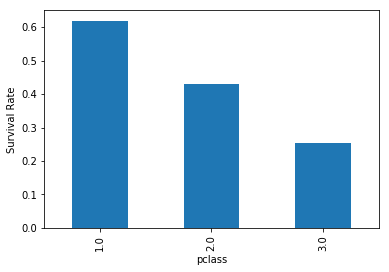

In [428]:
g = tc['survived'].groupby([tc['pclass']]).mean().plot.bar();
#tc['survived'].groupby([tc['pclass']]).mean()

g.set_ylabel('Survival Rate');

From here we can see that about 60% of the pclass 1, about 40% of pclass 2 and about 25% of pclass 3 have survived.

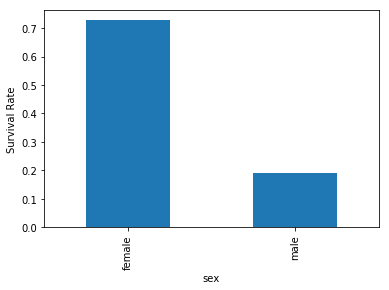

In [429]:
g = tc['survived'].groupby([tc['sex']]).mean().plot.bar();

g.set_ylabel('Survival Rate');

About 70% of female survivors and 20% of male

Looking at the graphs above it is very clear to see that 

1) More of women(female) survived

2) More of the pclass 1 and 2 survived compared to pclass 3

3) Adults and children survivors were almost the same and that is because of more female adults who survived.

## Decision Tree with depth of 1

In [411]:
tc_tree = tc[['pclass', 'sex', 'age', 'survived']].copy()

I'm creating another a copy of dataframe to avoid warnings ahead when we change values in the df. This new dataframe only contains data like sex, age, survived (yes/no or 1/0) and pclass (the class of a person)

In [412]:
le = pp.LabelEncoder()
tc_tree["sex"]=le.fit_transform(tc_tree["sex"].astype(str))

In [413]:
tc_tree.dropna(inplace = True)
tc_tree = tc_tree[tc_tree.pclass != 0]

To clean this dataset, I have removed all the entities with NaN values and only selected those where the pclass is not equal to 0. Because a person is either class 1, 2 or 3.

Also, encoded the sex column, such that we have numeric values such as 0 (female) and 1 (male)

### Build the decision tree

In [414]:
X = tc_tree.drop('survived', axis=1)
y = tc_tree['survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = tree.DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
#model

y_predict = model.predict(X_test)
# split data into training and split.. if you use the whole thing into trainig...

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

list(model.classes_)

#X

0.81297709923664119

[0.0, 1.0]

While X behaves as input values such as age, sex and pclass, 'y' behaves as output or target values which is survived or not. This is done because our target over here is to predict if a person depending on his/her, age and pclass will survive or not in the titanic.

I have used predit here to validate the accuracy of the model created using the training data. 

Here the table says the accuracy of the model is 81.29%. This means that if there are 75% of the women who survive then according to the accuracy only 80% of the predictive model is accurate.

I used the below reference to compare how accurate the model is by comparing the y_test and y_predict.
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


###### What is tc_tree?
tc_tree is used to come up with a predictive model. In this case we want to use the decision tree. tc_tree is first split into training and test data. We use the training data to come up with a model. THen we use the test data and check the accuracy of the data. For this we use the X_test and find the y_predict. We then compare the y_predict and the y_test to see how close the numbers are and thus determine the accuracy.

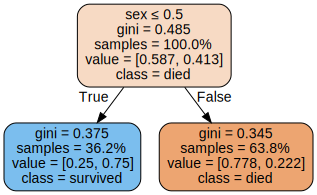

In [415]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = ["survived" if i == 1 else "died" for i in model.classes_] ,
                         #class_names = model.classes_,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph 


### Explanation of the decision tree

By using leEncoder, sex is denoted as 0 for "female" and 1 for "male".  Hence this decision tree says that, if it is a female (ie. sex = 0) then they have 75% of survival chance and if it is male they have 22.2% of survival chance.

The gini value represents the purity of the data. If the gini value is 0, then the data is of the purest form.

### Visualization of decision tree


The single depth decision tree is based on the sex. The decision tree model compares the sex and if female shows the survival rate is 0.75 and if male then rate is 0.222

To represent this on a factor plot we need to use sex and survived as the axes. 

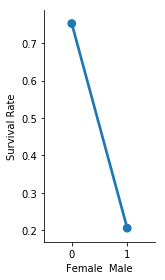

In [416]:
g = sns.factorplot(x="sex", y="survived", data=tc_tree, saturation=.5, ci=None, aspect=.6)

g.set_ylabels('Survival Rate');
g.set_xlabels('Female  Male');

The factor plot show the survival rate of a little more than 0.7 for females and about 0.2 survival rate for men. 

### Statistical reproduction of decision

In [417]:
from scipy.stats import ttest_ind
#t = tc_tree[tc_tree['sex']==0]['sex']
#p = tc_tree[tc_tree['sex']==1]['sex']

#ttest_ind(t, p, equal_var = False)
              
              #equal_var=False)
#, p
#print("t and p values are")
#print(t)
#print("  ")
#print(p)

#tc_tree[tc_tree['sex']<0.5].head(2)
#tc_tree[tc_tree['sex']>0.5].head(2)
#tc_tree[tc_tree['sex']<0.5].mean()
#tc_tree[tc_tree['sex']>0.5].mean()
#ttest_ind(tc_tree[tc_tree['sex']<0.5].mean(), tc_tree[tc_tree['sex']>0.5].mean())
#ttest_ind(tc_tree[tc_tree['sex']<0.5], tc_tree[tc_tree['sex']>0.5])
p = tc_tree[tc_tree['sex']<0.5]['survived']
t = tc_tree[tc_tree['sex']>0.5]['survived']
ttest_ind(p, t, equal_var = False)

print(" ")

ttest_ind(tc_tree[tc_tree['sex']<0.5].mean(), tc_tree[tc_tree['sex']>0.5].mean())

Ttest_indResult(statistic=20.269466067634454, pvalue=1.6296609399275591e-73)

Ttest_indResult(statistic=-0.064241093353295878, pvalue=0.95086508014261639)

Ttest indicates whether the mean of two data series differ from each other or not. There is a concept of "Null hypothesis" - which assumes both the series are the same. The ttest gives output that indicates how much they are different from the Null hypothesis. 
http://hamelg.blogspot.in/2015/11/python-for-data-analysis-part-24.html

In this case we want to compare the decisions of the tree classifier. The tree classifier's decision is based on gender - female and male. Comparing the survival rate of the two we get the following using ttest

Ttest_indResult(statistic=20.269466067634454, pvalue=1.6296609399275591e-73)

the pvalue is much lesser than 0.05 which means the null hypothesis (both are same) can be rejected. This means that both the series are different.

I was not able to come up with a clear and precise output or inference and hence this is a future roadmap.

Reference:
* http://benalexkeen.com/comparative-statistics-in-python-using-scipy/
* https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html


## Interpretation
The single depth decision tree is based on the gender - male & female. In the decision tree, if the person is a female there is about 70% probability that she survived. And if the person is male there is about 20% probability that he survived. The accuracy of this decision tree is 80%.

Reference:
* http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/
* http://scikit-learn.org/stable/tutorial/basic/tutorial.html
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html


## Develop a decision tree with depth of 2

Similar to builing the previous decision tree with depth 1, except here we change the value of depth to be equal to 2.

In [418]:
model2 = tree.DecisionTreeClassifier(max_depth=2)
#model2

model2.fit(X_train, y_train)

y_predict = model2.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

list(model2.classes_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.83587786259541985

[0.0, 1.0]

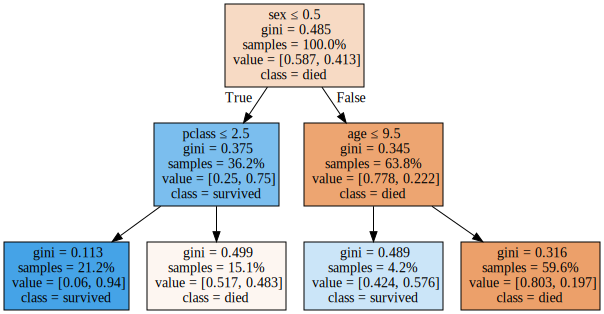

In [419]:
dot_data_2 = tree.export_graphviz(model2, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = ["survived" if i == 1 else "died" for i in model2.classes_] ,
                         filled=True, 
                         special_characters=True,
                               proportion=True)  
graph = graphviz.Source(dot_data_2)  
graph 

### Explanation of the decision tree

The root node compares male and female and tells us that If it is female and her class is less than 1 or 2, then high chance of survival (94%). If she is of pclass 3 then therei s only 48.3% of survival.

Incase of male, if they are a child (less than 10 years) then they have 57.6% of survival chance, otherwise adults have only 19.7% of survival chance.

###  Visualization of the left side of the decision tree

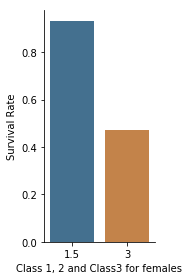

In [420]:

tc_tree['pc'] = np.where(((tc_tree['pclass'] == 1) | (tc_tree['pclass'] == 2)), '1.5', '3')
g = sns.factorplot(x="pc", y="survived",  data=tc_tree[tc_tree['sex']<0.5],saturation=.5,kind="bar", ci=None, aspect=.6)
g.set_ylabels('Survival Rate');
g.set_xlabels('Class 1, 2 and Class3 for females'); 

The above bar chart shows that Class 1 and Class 2 females together have about 0.9 rate of survival whereas class 3 have about 0.5.

### Statistical representation of left side of Decision


In [421]:
from scipy.stats import f_oneway, ranksums
#t, p = ttest_ind(Xy_train[Xy_train['sex']<1.5], Xy_test[Xy_test['sex']<1.5], equal_var=False)
#rank = ranksums(Xy_train[Xy_train['sex']<1.5], Xy_test[Xy_test['sex']<1.5])
#oneway = f_oneway(Xy_train[Xy_train['sex']<1.5], Xy_test[Xy_test['sex']<1.5])
rank = ranksums(tc_tree[(tc_tree['sex']<0.5) & (tc_tree['pclass']<2.5)]['survived'], tc_tree[(tc_tree['sex']<0.5) & (tc_tree['pclass']>2.5)]['survived'])
oneway = f_oneway(tc_tree[(tc_tree['sex']<0.5) & (tc_tree['pclass']<2.5)]['survived'], tc_tree[(tc_tree['sex']<0.5) & (tc_tree['pclass']>2.5)]['survived'])
print(rank)
print(oneway)

RanksumsResult(statistic=7.6264271930953198, pvalue=2.4134913208883318e-14)
F_onewayResult(statistic=142.07252159375869, pvalue=4.1875293480157111e-28)


Ranksum is another tool indicates whether the mean of two data series differ from each other or not. The ranksum gives output that indicates how much they are different from the Null hypothesis. 

In this case we want to compare the decisions of the left side of the tree classifier. The tree classifier's decision is based on pclass- class1,2 versus class 3 for females. Comparing the survival rate of the two we get the following using Ranksum
RanksumsResult(statistic=7.6264271930953198, pvalue=2.4134913208883318e-14)
the pvalue is much lesser than 0.05 which means the null hypothesis (both are same) can be rejected. This means that both the series are different.

You can just say f_oneway is similar to ranksums but uses ANOVA (analysis of variance) and can compare more than 2 series.

I was not able to come up with a clear and precise output or inferance and hence this is a future roadmap.

Reference:
* https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.ranksums.html
* https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.f_oneway.html
* http://benalexkeen.com/comparative-statistics-in-python-using-scipy/

###  Visualization of the right side of the decision tree

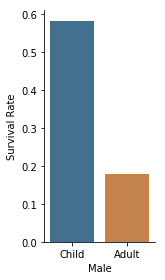

In [422]:
#g = sns.factorplot(x="sex", y="survived", data=tc_tree[tc_tree['sex']>1.5], col="pclass",saturation=.5,kind="bar", ci=None, aspect=.6)

#g = sns.factorplot(x="pclass", y="survived", data=g = sns.factorplot(x="pclass", y="survived", data=tc_tree[tc_tree['sex']>0.5],saturation=.5,kind="bar", ci=None, aspect=.6)

#g = sns.factorplot(x="age", y="survived", data=tc_tree[tc_tree['sex']>0.5],saturation=.5,kind="bar", ci=None, aspect=.6)
#g.set_ylabels('Survival Rate');
#g.set_xlabels('Class 1,2(1.5) and Class3');

tc_tree['child'] = np.where((tc_tree['age'] < 9.5), 'Child', 'Adult')
g = sns.factorplot(x="child", y="survived", data=tc_tree[tc_tree['sex']>0.5],saturation=.5,kind="bar", ci=None, aspect=.6)
g.set_ylabels('Survival Rate');
g.set_xlabels('Male');

The above bar chart shows that a male Child has about 0.57 rate of survival whereas an Adult has about 0.19.

### Use the ranksums test from scipy.stats to statistically reproduce the decisions on the right side.


In [423]:
from scipy.stats import f_oneway, ranksums
#t, p = ttest_ind(Xy_train[Xy_train['sex']<1.5], Xy_test[Xy_test['sex']<1.5], equal_var=False)
#rank = ranksums(Xy_train[Xy_train['sex']<1.5], Xy_test[Xy_test['sex']<1.5])
#oneway = f_oneway(Xy_train[Xy_train['sex']<1.5], Xy_test[Xy_test['sex']<1.5])
rank = ranksums(tc_tree[(tc_tree['sex']>0.5) & (tc_tree['age']<9.5)]['survived'], tc_tree[(tc_tree['sex']>0.5) & (tc_tree['age']>9.5)]['survived'])
oneway = f_oneway(tc_tree[(tc_tree['sex']>0.5) & (tc_tree['age']>2.5)]['survived'], tc_tree[(tc_tree['sex']>0.5) & (tc_tree['age']>9.5)]['survived'])
print(rank)
print(oneway)

RanksumsResult(statistic=4.4166379535516365, pvalue=1.0024793022808227e-05)
F_onewayResult(statistic=0.45772879631039465, pvalue=0.49881220845700114)


In this case we want to compare the decisions of the right side of the tree classifier. The tree classifier's decision is based on age - Adult or Child males. Comparing the survival rate of the two we get the following using Ranksum
RanksumsResult(statistic=4.4166379535516365, pvalue=1.0024793022808227e-05)
the pvalue is much lesser than 0.05 which means the null hypothesis (both are same) can be rejected. This means that both the series are different.

I was not able to come up with a clear and precise output or inferance and hence this is a future roadmap.

## Interpretation
The two depth decision tree is based on the gender - male of female and then based on class for females and age for males.  In the decision tree, if the person is a female and class is 1 or 2 there is a 94% probability that she survived. Where as if the person is a male child there is a 57% probability and if a male Adult there is a 19% probability that he survived. The accuracy of this decision tree is about 83%.

# Conclusion

Overall we see that Females compared to males in general have higher survival chance and Children have higher survival chance than Adults.